# Yasser Ashraf

# Load Libraries

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,roc_curve,auc 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

# Importing the Data

In [329]:
df_titanic= pd.read_csv('./content/titanic.csv')

In [330]:
df_titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


# Initial EDA

## Titanic Dataset Column Description
* **Survived:**
This column indicates whether the passenger survived the Titanic disaster. It is a binary variable:

  * 0: Did not survive
  * 1: Survived

* **Pclass:**
Represents the passenger's class on the Titanic. It is a categorical numeric variable:

  * 1: First class
  * 2: Second class
  * 3: Third class

* **Name:**
The full name of the passenger, including titles such as Mr., Mrs., Miss., etc. This column may be useful for further analysis, such as extracting titles for gender or age-based patterns.

* **Sex:**
This column specifies the gender of the passenger. It is a categorical variable:

  * male
  * female

* **Age:**
The age of the passenger at the time of the voyage. This is a continuous numeric variable. Missing values may need to be imputed or handled in analysis.

* **Siblings/Spouses Aboard:**
The number of siblings or spouses the passenger was traveling with. This is a discrete numeric variable.

* **Parents/Children Aboard:**
The number of parents or children the passenger was traveling with. This is also a discrete numeric variable.

* **Fare:**
The fare paid by the passenger for their ticket. It is a continuous numeric variable, with values representing the amount of money the passenger spent based on their class, cabin, and other factors.

In [331]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [332]:
df_titanic.isnull().sum().sum()

0

In [333]:
df_titanic.duplicated().sum()

0

* **887** -> rows
* **8**   -> features
* **0**   -> null value
* **0**   -> duplicated

In [334]:
df_titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


### survival:
The survival rate is quite low, suggesting that the majority of the passengers did not survive.
### Pclass:
Most passengers belong to the 3rd class (since the 50th percentile is 3).

### Age:
The 25th percentile is 20.25 years, and the 75th percentile is 38 years, showing that the middle 50% of passengers are between 20.25 and 38 years old.
Median age is 28 years, indicating a slight skew towards younger ages.
### Siblings/Spouses Aboard - Parents/Children Aboard
Most passengers traveled without siblings, spouses, parents or children
### Fare
25th percentile is 7.925, and 75th percentile is 31.1375, indicating a significant portion of passengers paid **relatively** low fares.
The median fare is 14.4542, suggesting that most fares were on the lower end, but some high fares significantly increase the mean.

# Data Preprocessing

## 1-Data Cleaning

* **Handling missing values:**
We can check for null values using `.isnull()` and fill them in using `.fillna()`
* **Removing duplicates:**
We can use `.drop_duplicates()`

## 2-Encoding categorical variables




In [335]:
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Sex' column and assign the result directly to the original DataFrame using .loc
df_titanic.loc[:, 'Sex'] = label_encoder.fit_transform(df_titanic['Sex'])

We can use `lableEncoder` or `OneHotEncoder`

In [336]:
df_titanic['Sex'].value_counts()

Sex
1    573
0    314
Name: count, dtype: int64

## Converting data types

In [337]:
df_titanic['Sex'] = pd.to_numeric(df_titanic['Sex'])

* 1->Male
* 0->Femal

## 3-Changing column order


In [338]:
df_titanic = df_titanic[['Name', 'Sex', 'Age', 'Pclass', 'Fare', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Survived']]
df_titanic

,Name,Sex,Age,Pclass,Fare,Siblings/Spouses Aboard,Parents/Children Aboard,Survived
0,Mr. Owen Harris Braund,1,22.0,3,7.2500,1,0,0
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,71.2833,1,0,1
2,Miss. Laina Heikkinen,0,26.0,3,7.9250,0,0,1
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,53.1000,1,0,1
4,Mr. William Henry Allen,1,35.0,3,8.0500,0,0,0
...,...,...,...,...,...,...,...,...
882,Rev. Juozas Montvila,1,27.0,2,13.0000,0,0,0
883,Miss. Margaret Edith Graham,0,19.0,1,30.0000,0,0,1
884,Miss. Catherine Helen Johnston,0,7.0,3,23.4500,1,2,0
885,Mr. Karl Howell Behr,1,26.0,1,30.0000,0,0,1


**Target** "Survived" At the last column

# Comprehensive EDA

## Data Visualization

### 1.Histograms
Use `.hist()`**bold text** in pandas to get a visual representation of the distribution of a numeric variable. This can reveal outliers, skewness, and other patterns.

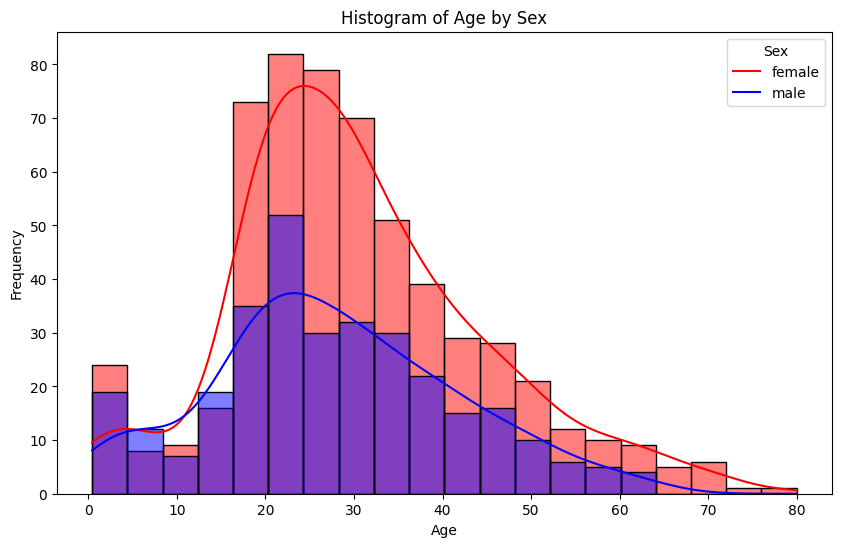

In [339]:
# Set custom colors for each numerical label
sex_colors = {0: 'blue', 1: 'red'}

# Map numerical labels back to original labels
sex_labels = {0: 'female', 1: 'male'}

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_titanic, x='Age', hue='Sex', palette=sex_colors, hue_order=[0, 1], kde=True, bins=20)

# Set legend labels
plt.legend(labels=[sex_labels[i] for i in sorted(df_titanic['Sex'].unique())], title='Sex')

plt.title('Histogram of Age by Sex')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


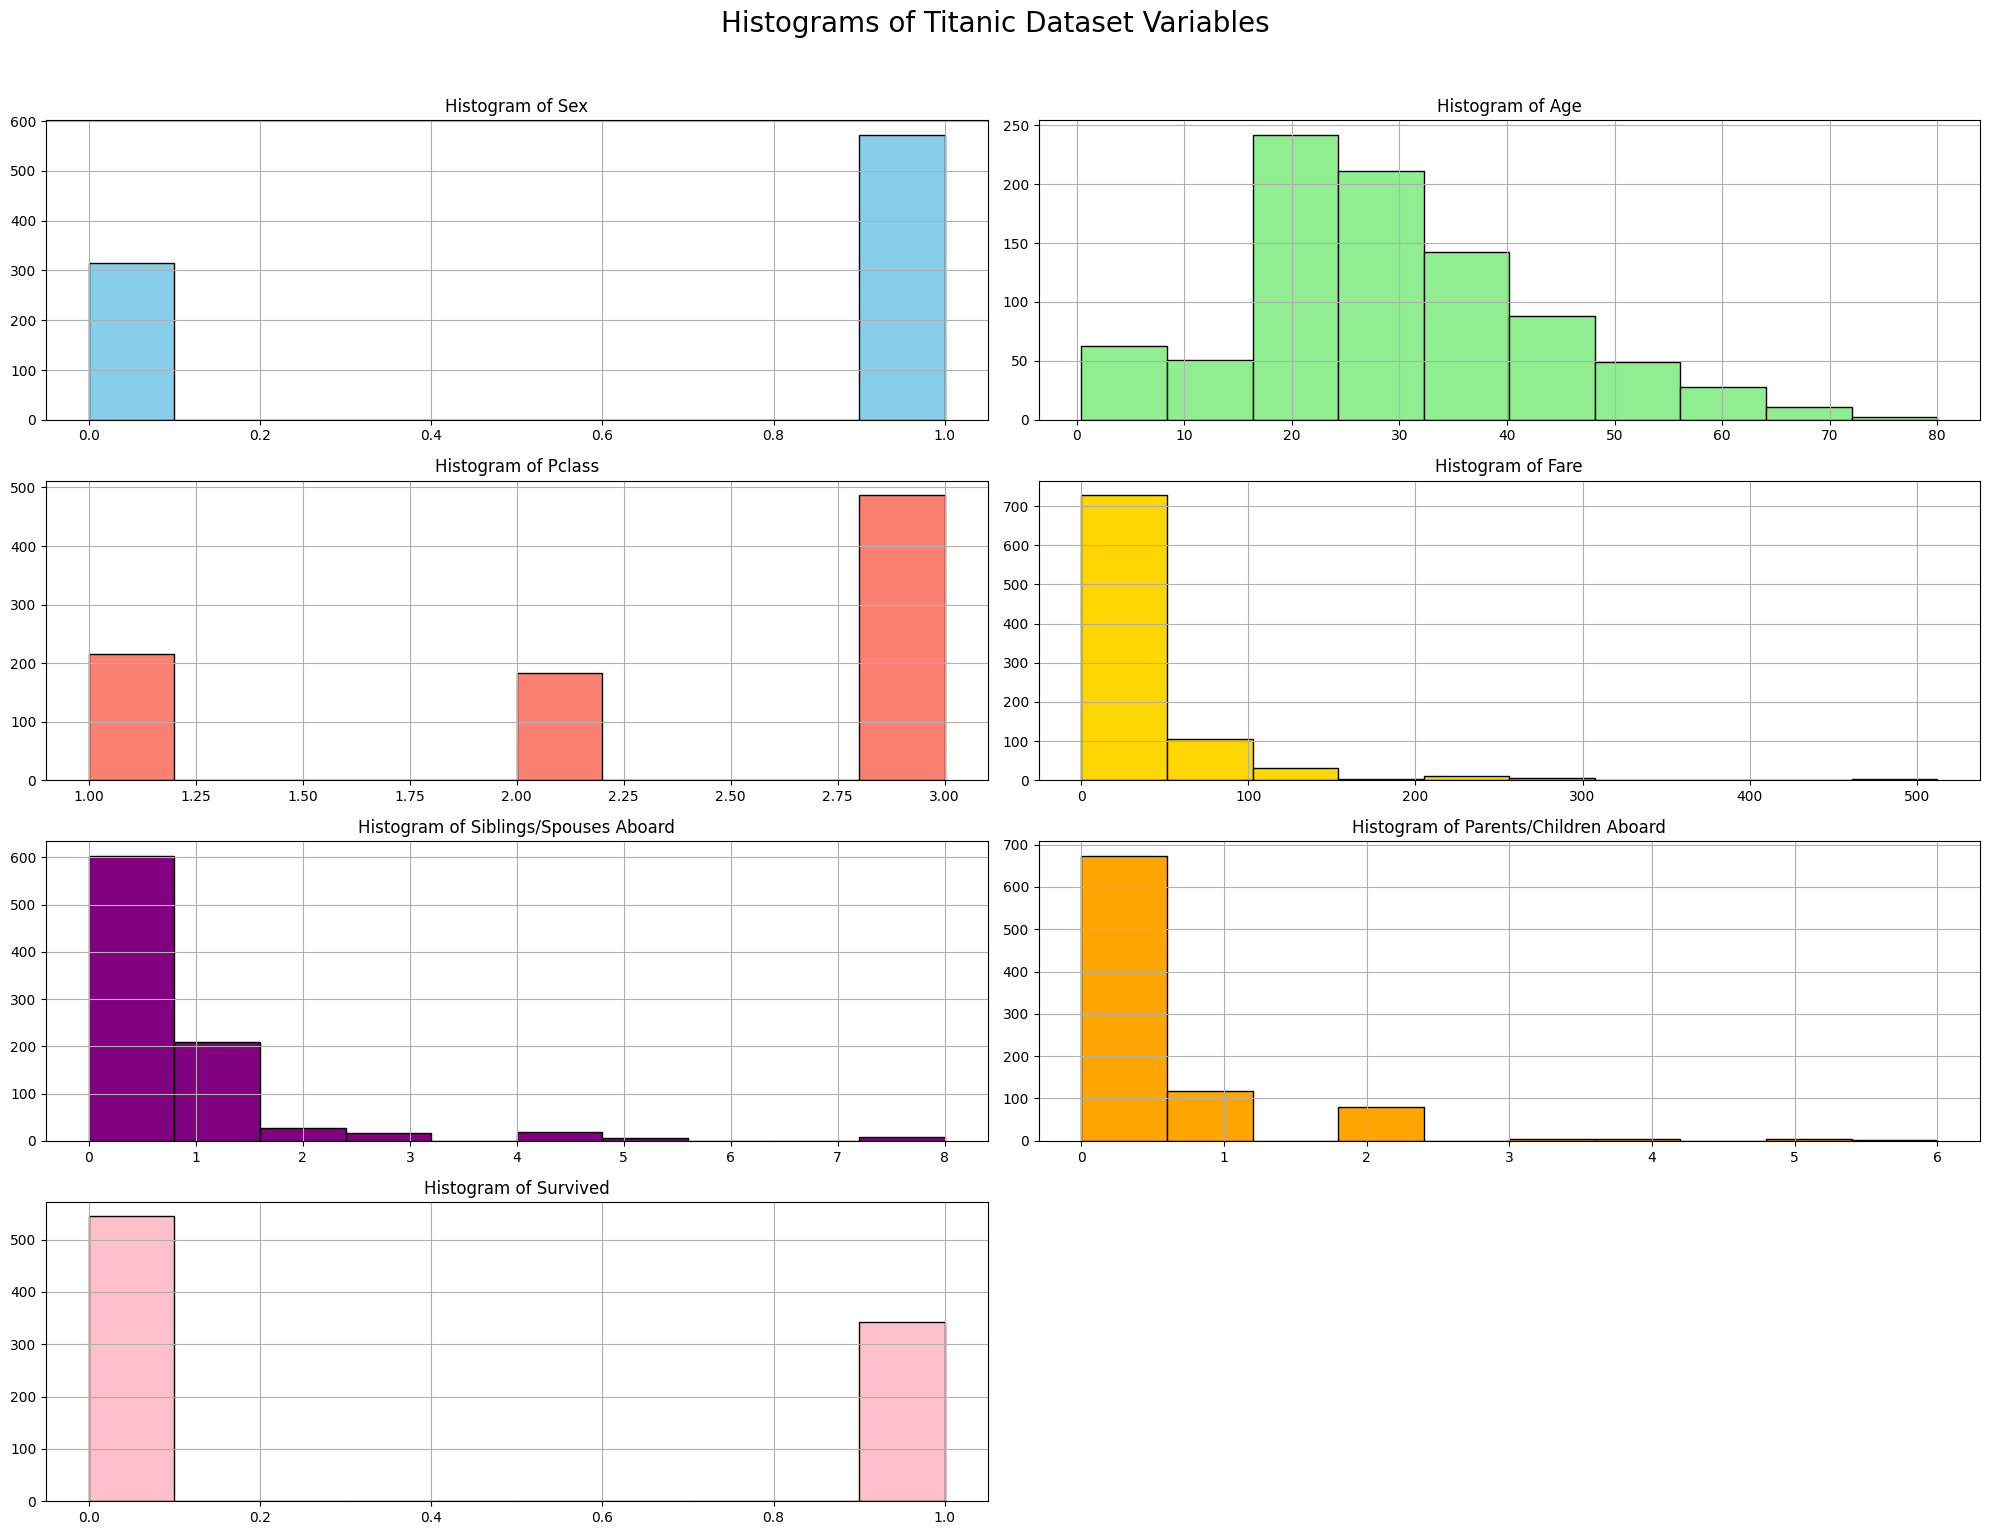

In [340]:
# Adjust figure size for all plots
plt.rcParams['figure.figsize'] = (20, 15)

# Define a list of colors
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'purple', 'orange', 'pink', 'cyan']

# Plot histograms for all numerical columns with different colors
columns = df_titanic.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(4, 2)

for idx, column in enumerate(columns):
    ax = axes[idx // 2, idx % 2]  # Access subplot position
    df_titanic[column].hist(bins=10, edgecolor='black', color=colors[idx % len(colors)], ax=ax)
    ax.set_title(f'Histogram of {column}')

# Remove unused subplots if there are fewer than 8 variables
for i in range(len(columns), 8):
    fig.delaxes(axes.flatten()[i])

# Add a title for the entire figure
plt.suptitle('Histograms of Titanic Dataset Variables', fontsize=20, y=1.02)

# Show the plot
plt.tight_layout()
plt.show()


###2.Scater plots

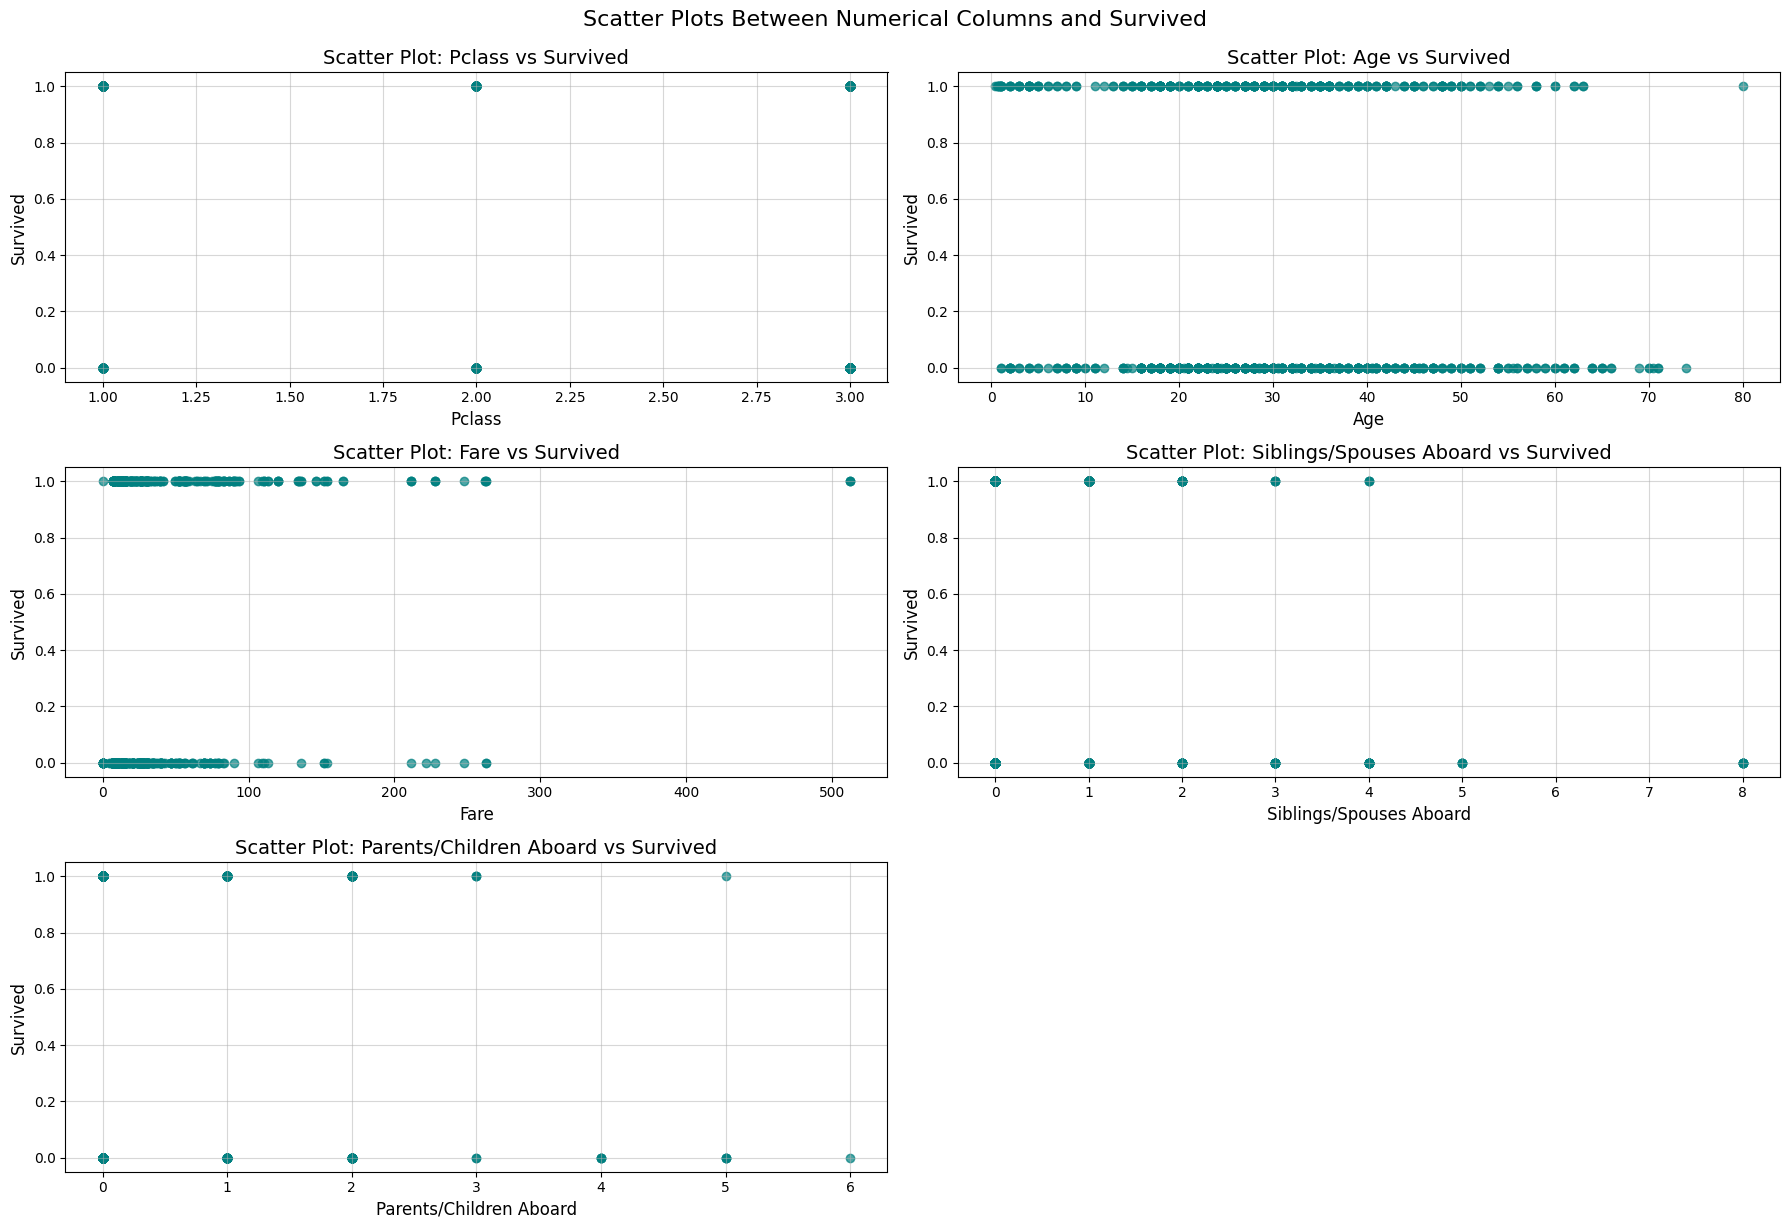

In [341]:
# List of numerical columns to plot against 'Survived'
numerical_columns = ['Pclass', 'Age', 'Fare', 'Siblings/Spouses Aboard', 'Parents/Children Aboard']

# Create scatter plots
plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(3, 2, i)
    plt.scatter(df_titanic[col], df_titanic['Survived'], alpha=0.7, color='teal')
    plt.title(f'Scatter Plot: {col} vs Survived', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Survived', fontsize=12)
    plt.grid(alpha=0.5)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.suptitle('Scatter Plots Between Numerical Columns and Survived', fontsize=16, y=1.02)
plt.show()

### 3.Bar plot

C:\Users\PC\AppData\Local\Temp\ipykernel_20284\2952676675.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_titanic, x='Sex', y='Survived', palette='Set1', ci=None)
C:\Users\PC\AppData\Local\Temp\ipykernel_20284\2952676675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_titanic, x='Sex', y='Survived', palette='Set1', ci=None)


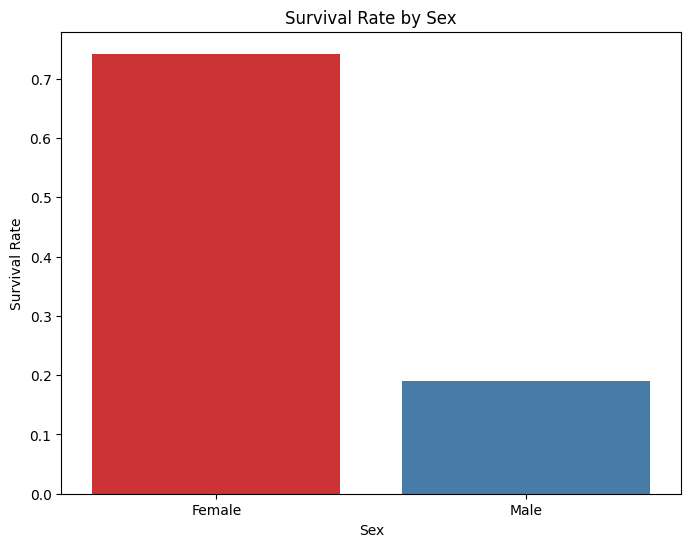

In [342]:
# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=df_titanic, x='Sex', y='Survived', palette='Set1', ci=None)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()


Imbalance in Gender Distribution: The dataset has a higher proportion of males (64.6%) compared to females (35.4%).

### 4.Pie chart

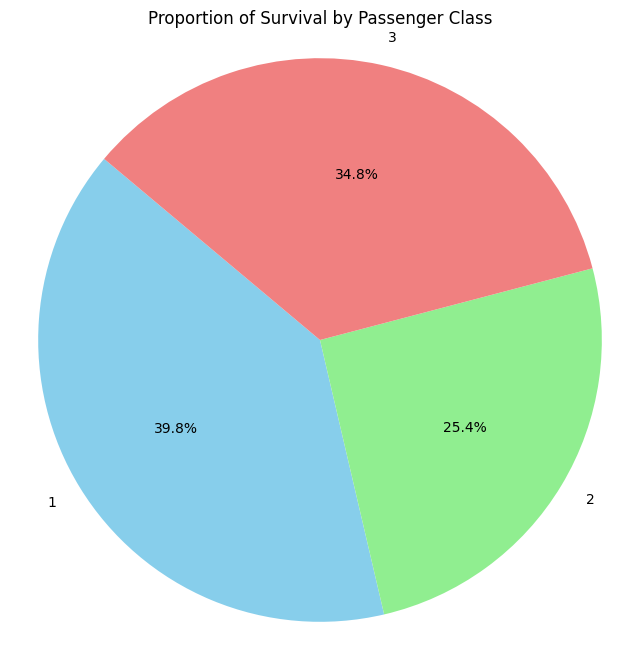

In [343]:
# Calculate the survival count for each passenger class
survival_count = df_titanic.groupby('Pclass')['Survived'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(survival_count, labels=survival_count.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Proportion of Survival by Passenger Class')
plt.axis('equal')
plt.show()

## Check for outliers
### Box Plots

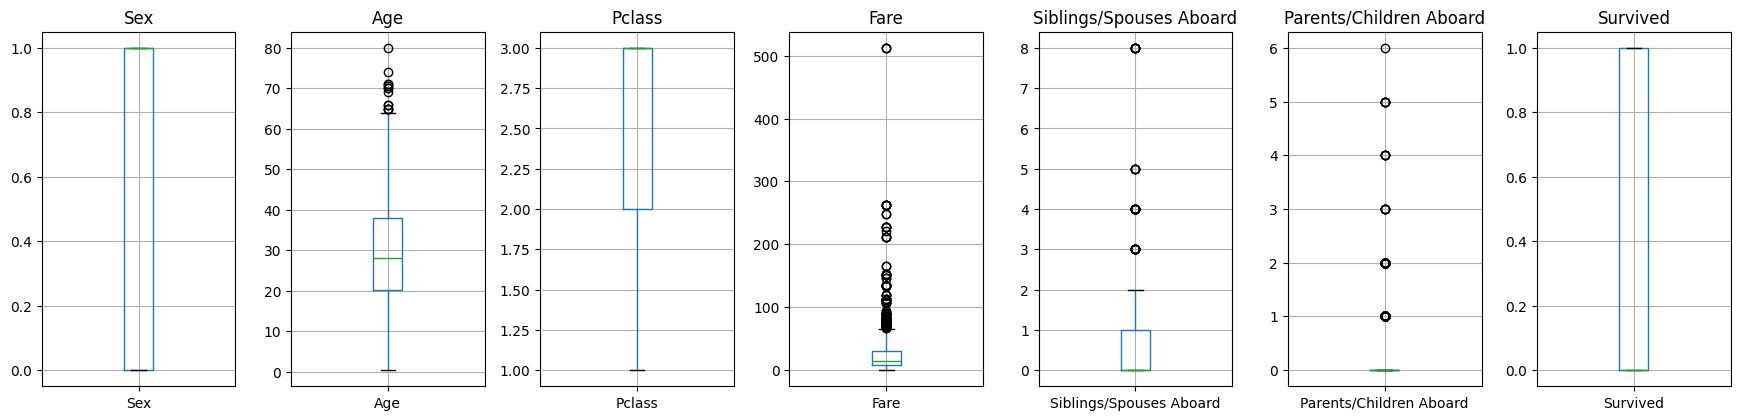

In [344]:
# Select numerical columns
numerical_columns = df_titanic.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for numerical columns
plt.figure(figsize=(20, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2,8 , i)
    df_titanic.boxplot(column=col)
    plt.title(col)
    plt.tight_layout()

plt.show()

## Correlation heatmaps
Use a `seaborn heatmap()` to visualize the correlation between all numeric variables.

#### What we are interested in is what is corelated to servival
#### The lower the number in pclass the higher the number in servival

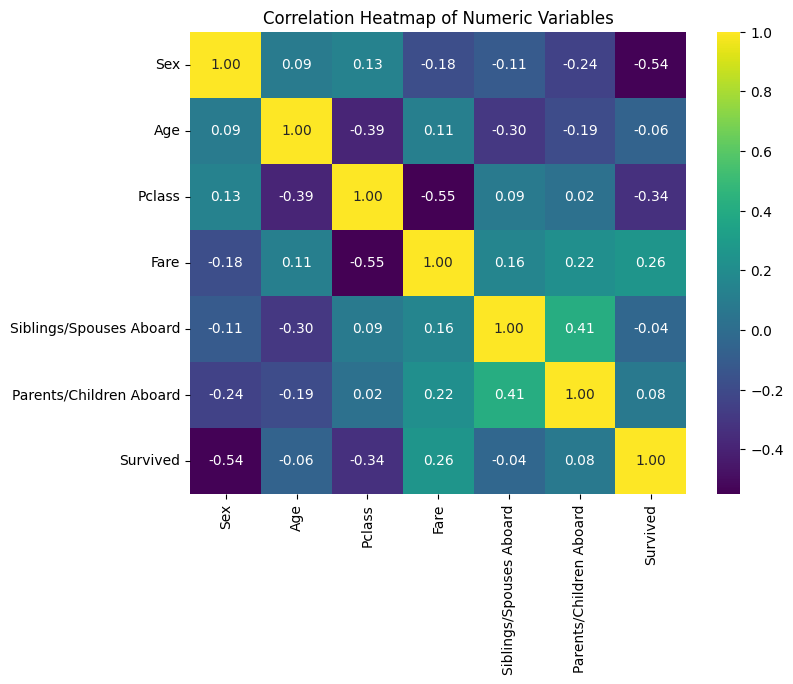

In [345]:
numeric_df = df_titanic.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

### Correlation of "Survived" with Other Features:
* 1. Correlation with **'Sex'**
  * The target variable "Survived" is** strongly negatively** correlated with the 'Sex' feature, with a correlation coefficient of **-0.54**.
  * This indicates that males (represented by 0) were less likely to survive compared to females (represented by 1), which aligns with historical data from the Titanic disaster.
* 2. Correlation with **'Pclass'**
  * The target variable "Survived" shows a **strong negative** correlation with 'Pclass', with a coefficient of **-0.34**.
  * This suggests that passengers in higher classes (lower 'Pclass' values) had a higher likelihood of survival compared to those in lower classes (higher 'Pclass' values).

3. Correlation with **'Fare'**
  * The target variable has a **moderate positive** correlation with 'Fare', with a coefficient of **0.26**.
  * This suggests that passengers who paid higher fares had a slightly higher chance of survival.
4. **Other Features**
  * There is no significant correlation between "Survived" and other features such as 'Siblings/Spouses Aboard', 'Parents/Children Aboard', and others in the dataset. These features do not show strong patterns of association with survival.




# Models

## 1.1 Simple Logistic Regression

In [346]:
# Split the DataFrame into features (X) and target (y)
X_single = df_titanic[['Sex']]
y_single = df_titanic['Survived']
# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_single, y_single, test_size=0.2, random_state=42)

In [347]:
X_single

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
882,1
883,0
884,0
885,1


In [348]:
X_train1

,Sex
730,1
390,1
118,0
440,0
309,0
...,...
106,1
270,0
860,1
435,1


In [349]:
# Apply logistic regression
simple_log_reg = LogisticRegression()
simple_log_reg.fit(X_train1, y_train1)

# Make predictions
simple_y_pred = simple_log_reg.predict(X_test1)

# Evaluate the model
accuracy1 = accuracy_score(y_test1, simple_y_pred)
class_report1 = classification_report(y_test1, simple_y_pred)

print(f'Accuracy: {accuracy1}')
print('Classification Report:')
print(class_report1)

Accuracy: 0.7415730337078652
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       111
           1       0.70      0.55      0.62        67

    accuracy                           0.74       178
   macro avg       0.73      0.70      0.71       178
weighted avg       0.74      0.74      0.73       178



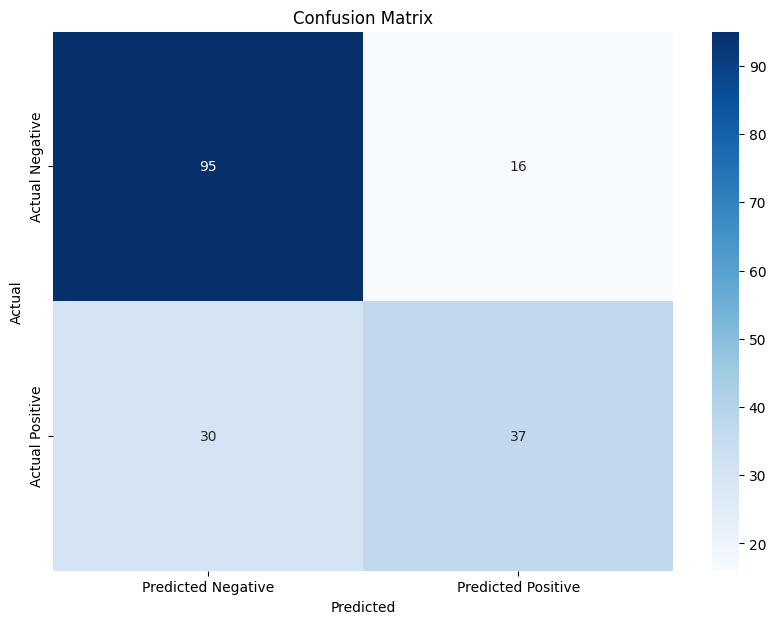

In [350]:
conf_matrix1= confusion_matrix(y_test1, simple_y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 1.2 Logistic with Multiple Predictor




In [351]:
# Split the DataFrame into features (X) and target (y)
X = df_titanic[['Sex', 'Pclass','Fare']]
y = df_titanic['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [352]:
X

,Sex,Pclass,Fare
0,1,3,7.2500
1,0,1,71.2833
2,0,3,7.9250
3,0,1,53.1000
4,1,3,8.0500
...,...,...,...
882,1,2,13.0000
883,0,1,30.0000
884,0,3,23.4500
885,1,1,30.0000


In [353]:
y

0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    0
885    1
886    0
Name: Survived, Length: 887, dtype: int64

In [354]:
# Apply logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)

Accuracy: 0.7415730337078652
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       111
           1       0.70      0.55      0.62        67

    accuracy                           0.74       178
   macro avg       0.73      0.70      0.71       178
weighted avg       0.74      0.74      0.73       178



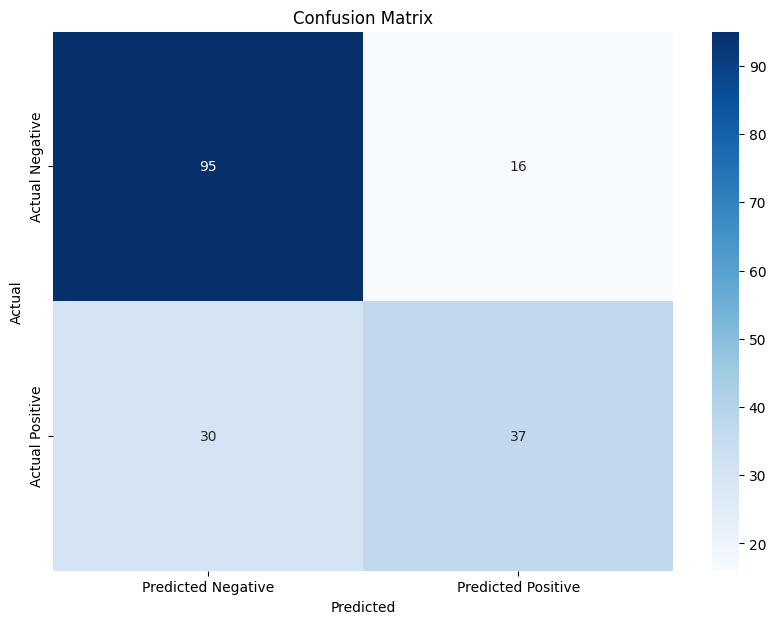

In [355]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [356]:
from sklearn.metrics import log_loss

# Predict probabilities
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability for class 1

# Calculate log loss
cost = log_loss(y_test, y_prob)

print(f'Log Loss (Cost Function): {cost}')


Log Loss (Cost Function): 0.528969174098033


In [357]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TP, FP, FN, TN
TN, FP, FN, TP = cm.ravel()

# Error metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f'Accuracy: {accuracy}')
error_rate = (FP + FN) / (TP + TN + FP + FN)
print(f'Error Rate: {error_rate}')

Accuracy: 0.7415730337078652
Error Rate: 0.25842696629213485


## Logistic Regression: Single vs. Multiple Predictors
### Summary of Results
After comparing the performance of simple and multiple logistic regression models, the following observations were made:

#### 1.Simple Logistic Regression with 'Sex' as the Only Predictor:
The accuracy of the simple logistic regression model using 'Sex' as the sole independent feature is **0.74**.

#### 2.Multiple Logistic Regression with 'Sex', 'Pclass', and 'Fare':
When using 'Sex', 'Pclass', and 'Fare' as predictors in the multiple predictor logistic regression model, the accuracy remains **0.74**, similar to the simple model using only 'Sex'.

#### 3.Simple Logistic Regression with 'Pclass' or 'Fare':
When using 'Pclass' or 'Fare' alone in the simple logistic regression model, the accuracy significantly decreases to approximately **0.66**.

### Key Insights:
* **There is no significant difference in accuracy** between the simple logistic regression model using only 'Sex' and the multiple predictor model that includes 'Sex', 'Pclass', and 'Fare' (**both achieving around 0.74**).

* **Lower Performance with 'Pclass' or 'Fare':**
Using 'Pclass' or 'Fare' individually in the simple logistic regression model results in lower accuracy, around **0.66**. This suggests that these features are not as strong predictors when used alone.


### Conclusion:
Based on the results, simple or multi-predictor logistic regression can be used **interchangeably**, especially when 'Sex' is a strong predictor.



☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣☣

# Ahmad Khlifa Abdulraouf 22010018


## Justification:
#### Sex 
* has a high negative correlation with Survived (-0.54), making it a significant predictor.
#### Pclass
* shows a moderate negative correlation (-0.34) with Survived.
#### Fare 
* has a weaker positive correlation (0.26) with Survived.
#### Other variables 
* like Siblings/Spouses Aboard (-0.04), Parents/Children Aboard (0.08), and Age (-0.06) show weaker correlations with Survived.

In [358]:
# Split the data into features (X) and target (y)
X = df_titanic[['Sex', 'Pclass']]  # Selecting the best predictors
y = df_titanic['Survived']  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

Training data size: (709, 2)
Testing data size: (178, 2)


### Train the Naive Bayes Classifier

In [359]:
# Initialize the Gaussian Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

print("Naive Bayes model trained successfully!")

Naive Bayes model trained successfully!


### Make Predictions and Evaluate the Model

In [360]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)


Model Accuracy: 0.74

Confusion Matrix:
[[95 16]
 [30 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       111
           1       0.70      0.55      0.62        67

    accuracy                           0.74       178
   macro avg       0.73      0.70      0.71       178
weighted avg       0.74      0.74      0.73       178



### Accuracy Bar Plot
The accuracy bar plot shows the performance of the Naive Bayes model, highlighting its accuracy on the test set.

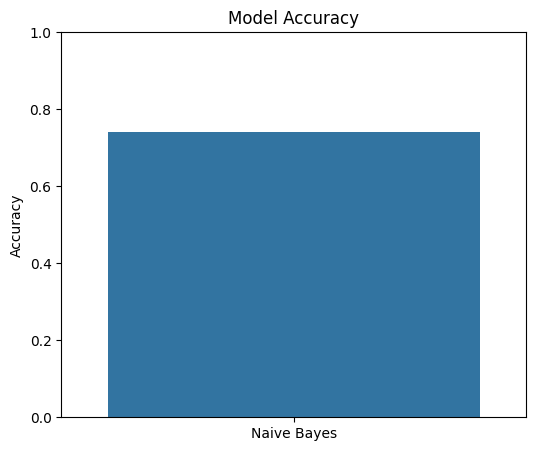

In [361]:
plt.figure(figsize=(6, 5))
sns.barplot(x=["Naive Bayes"], y=[accuracy])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

### Display Predictions

In [362]:
# Show a few predictions alongside actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Sample Predictions:")
display(results.head(10))

Sample Predictions:


,Actual,Predicted
296,1,0
682,0,0
535,0,0
644,1,0
623,0,0
39,1,1
529,0,0
585,0,0
723,1,1
141,1,1


### Confusion Matrix:
A heatmap visualization is created to show the confusion matrix between Survival

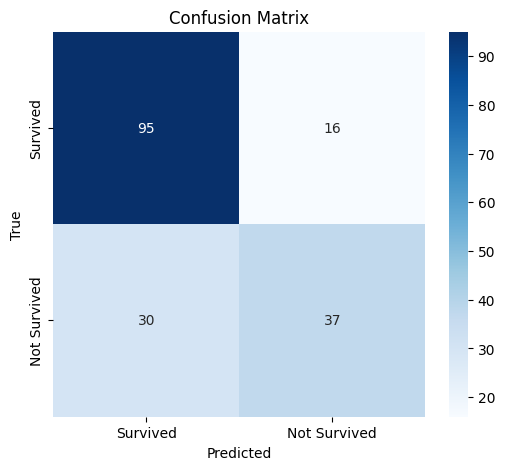

In [363]:
# Section 2: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Survived", "Not Survived"], yticklabels=["Survived", "Not Survived"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Performance Interpretation:
- The model has a relatively high number of true positives (95), meaning it did a good job of identifying survivors.
- However, it also made some false positives (16), predicting that passengers survived when they didn't.
- The model did miss some survivors, as indicated by the false negatives (30).
- The true negatives (37) show that the model was able to correctly predict many of the non-survivors.

##### True Positives (Survived, Predicted Survived): 95
- These are the cases where the model correctly predicted that the passenger survived.

##### False Positives (Not Survived, Predicted Survived): 16
- These are the cases where the model predicted survival, but the passenger did not survive.

##### False Negatives (Survived, Predicted Not Survived): 30
- These are the cases where the model predicted "Not Survived", but the passenger actually survived.

##### True Negatives (Not Survived, Predicted Not Survived): 37
- These are the cases where the model correctly predicted that the passenger did not survive.

### ROC Curve


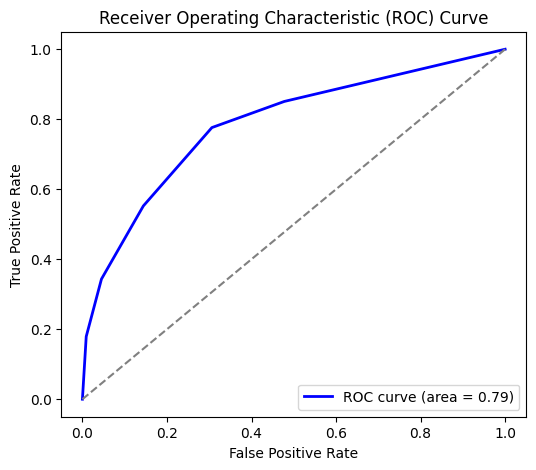

In [364]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 1. ROC Curve Overview
- The blue curve represents the ROC curve (Receiver Operating Characteristic curve) for the Naive Bayes model.
- The dashed diagonal line (gray) represents a random classifier (baseline).
- The curve shows a good separation between positive and negative classes, indicating the model performs better than random guessing.

### 2. AUC (Area Under Curve)
- The AUC value = 0.79, which suggests that the model has decent predictive ability.
- An AUC of 0.79 means the model correctly distinguishes between the classes about 79% of the time, which is reasonably good for a Naive Bayes model.